In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import xarray as xr

import jemma_ODE_solvers2 as jde
import CAFE_tools as jcafe

plt.rcParams.update({'font.size': 18})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

### Consider distributions

In [2]:
def histogram(data,bins,title='',xlabel='',ylabel='',ensemble_mean = np.nan,burgers_data = np.nan,
              burgers_bnds = np.nan, plot_normal = True,legend=True):
    plt.hist(data,bins=bins, color='#9DCBFE',density=True)
    plt.title(title,fontsize=16)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(ensemble_mean,1/(np.std(data)*10*np.pi),c='k',linestyle = 'None', marker = 'o', markersize = 5, label = 'Ensemble mean')
    
    if burgers_data is not np.nan:
        plt.errorbar(burgers_data,1/(np.std(data)*10*np.pi),xerr=burgers_bnds,c='k',linestyle = 'None', marker = '^', markersize = 10, label = 'Burgers et al 2005 result')
    if legend:
        plt.legend()
    plt.tight_layout()
        
def real_eig(filename):
    A = xr.open_dataset(filename+'_A.nc').A
    eigenvalues = np.linalg.eig(A)[0]
    return np.real(eigenvalues)

def imag_eig(filename):
    A = xr.open_dataset(filename+'_A.nc').A
    eigenvalues = np.linalg.eig(A)[0]
    return np.imag(eigenvalues[...,0])

def period(filename):
    return 2*np.pi/imag_eig(filename)

## Full time period seasonal fits

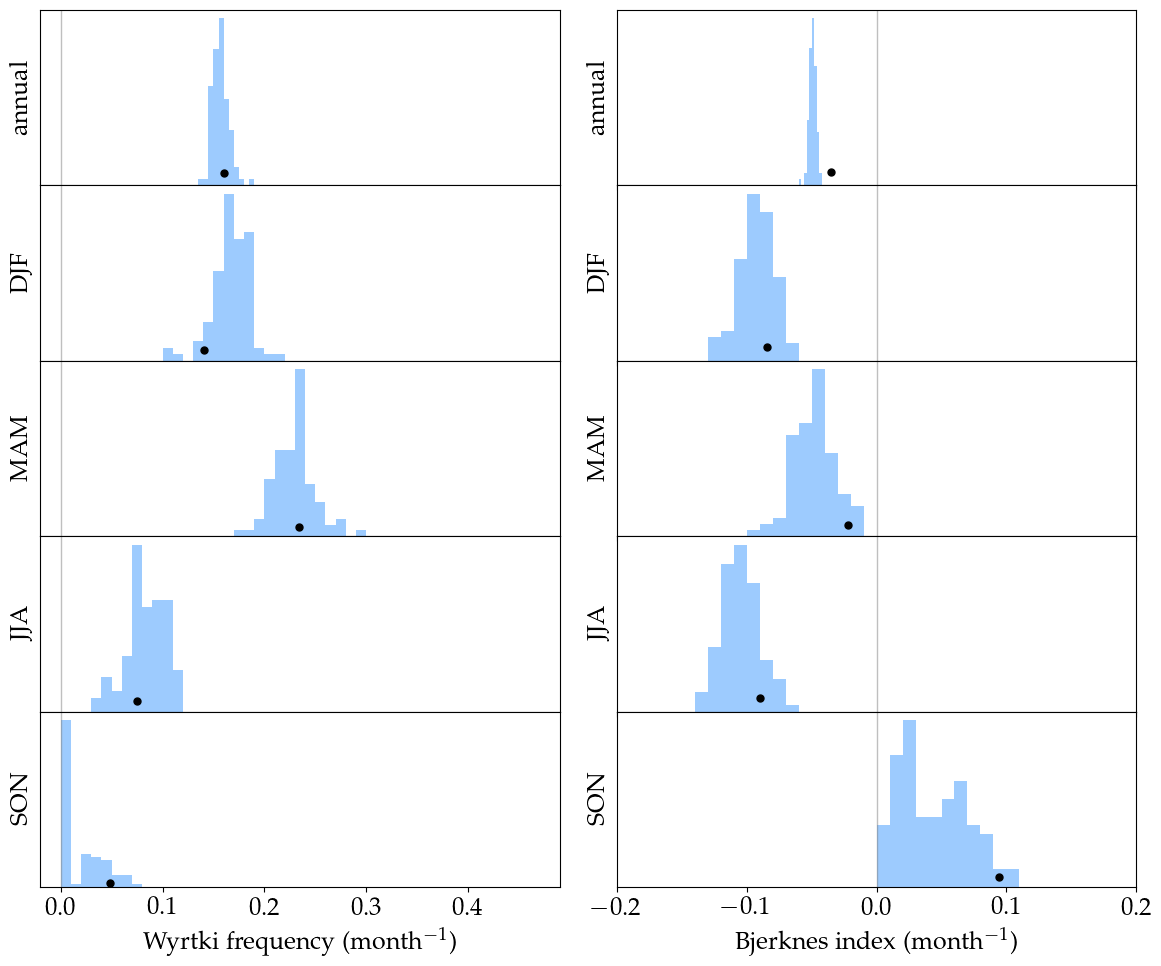

In [11]:
fig,ax = plt.subplots(5,2,figsize=(12,10),sharex='col')
ylabels = ('annual','DJF','MAM','JJA','SON')
for i,s in enumerate(('','_DJF','_MAM','_JJA','_SON')):
    plt.sca(ax[i,1])
    filename = 'fit_files/NINO34_SST__WHOLEPACIFIC_I20'+s+'_STD'
    data = np.max(real_eig(filename),2)
    years = xr.open_dataset(filename+'_A.nc').start_year
    bins = np.arange(-0.2,0.2,0.01)
    if i == 0:
        bins = np.arange(-0.2,0.2,0.002)
    histogram(data[0,1:],bins,title = '',
            ensemble_mean=[data[0,0]],
             legend=False,plot_normal=False
             )

    plt.xlim(-0.2,0.2)
    ylim = plt.ylim()
    plt.plot((0,0),ylim,c='gray',alpha=0.5,linewidth=1)
    plt.ylim(ylim)
    plt.yticks([])
    plt.ylabel(ylabels[i])

plt.xlabel('Bjerknes index (month$^{-1}$)')
    
for i,s in enumerate(('','_DJF','_MAM','_JJA','_SON')):
    plt.sca(ax[i,0])
    filename = 'fit_files/NINO34_SST__WHOLEPACIFIC_I20'+s+'_STD'
    data = imag_eig(filename)[:,1:]
    years = xr.open_dataset(filename+'_A.nc').start_year
    bins = np.arange(0,0.5,0.01)
    if i == 0:
        bins = np.arange(0,0.5,0.005)
    histogram(data[0,1:],bins,title = '',
            ensemble_mean=[data[0,0]],
             legend=False,plot_normal=False
             )
    plt.xlim(-0.02,0.49)
    ylim = plt.ylim()
    plt.plot((0,0),ylim,c='gray',alpha=0.5,linewidth=1)
    plt.ylim(ylim)
    plt.yticks([])
    plt.ylabel(ylabels[i])

plt.xlabel('Wyrtki frequency (month$^{-1}$)')
    
    
    
    
fig.subplots_adjust(hspace=0)

plt.savefig('paperplots/seasonal_hist_5.pdf',bbox_inches='tight')

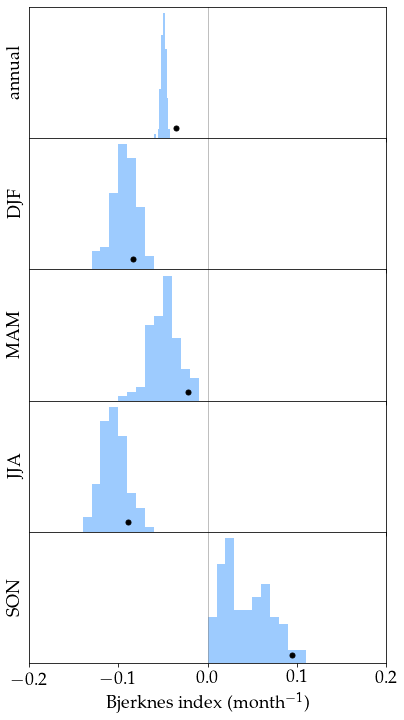

In [27]:
fig,ax = plt.subplots(5,1,figsize=(6,10),sharex=True)
ylabels = ('annual','DJF','MAM','JJA','SON')
for i,s in enumerate(('','_DJF','_MAM','_JJA','_SON')):
    plt.sca(ax[i])
    filename = 'fit_files/NINO34_SST__WHOLEPACIFIC_I20'+s+'_STD'
    data = np.max(real_eig(filename),2)
    years = xr.open_dataset(filename+'_A.nc').start_year
    bins = np.arange(-0.2,0.2,0.01)
    if i == 0:
        bins = np.arange(-0.2,0.2,0.002)
    histogram(data[0,1:],bins,title = '',
            ensemble_mean=[data[0,0]],
             legend=False,plot_normal=False
             )
          #burgers_data = 2*np.pi/np.imag(np.linalg.eig(Burgers_A)[0])[0]
    #ax[i].set_ylabel('Real '+s)
    plt.xlim(-0.2,0.2)
    ylim = plt.ylim()
    plt.plot((0,0),ylim,c='gray',alpha=0.5,linewidth=1)
    plt.ylim(ylim)
    plt.yticks([])
    plt.ylabel(ylabels[i])

plt.xlabel('Bjerknes index (month$^{-1}$)')
    

fig.subplots_adjust(hspace=0)
plt.savefig('paperplots/seasonal_real_hist_5.pdf')

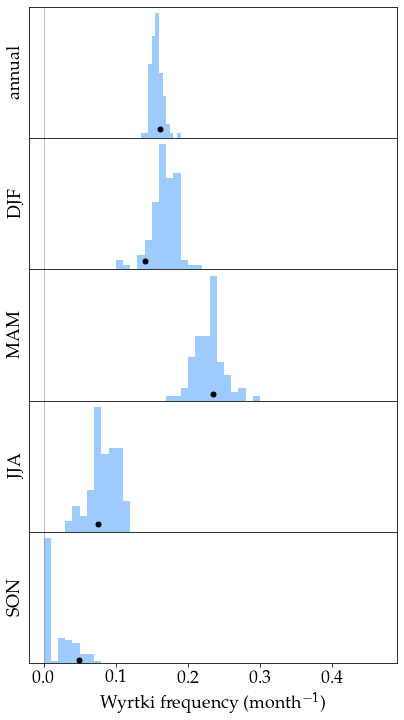

In [32]:
fig,ax = plt.subplots(5,1,figsize=(6,10),sharex = True)
ylabels = ('annual','DJF','MAM','JJA','SON')
for i,s in enumerate(('','_DJF','_MAM','_JJA','_SON')):
    plt.sca(ax[i])
    filename = 'fit_files/NINO34_SST__WHOLEPACIFIC_I20'+s+'_STD'
    data = imag_eig(filename)[:,1:]
    years = xr.open_dataset(filename+'_A.nc').start_year
    bins = np.arange(0,0.5,0.01)
    if i == 0:
        bins = np.arange(0,0.5,0.005)
    histogram(data[0,1:],bins,title = '',
            ensemble_mean=[data[0,0]],
             legend=False,plot_normal=False
             )
          #burgers_data = 2*np.pi/np.imag(np.linalg.eig(Burgers_A)[0])[0]
    #ax[i].set_ylabel('Real '+s)
    plt.xlim(-0.02,0.49)
    ylim = plt.ylim()
    plt.plot((0,0),ylim,c='gray',alpha=0.5,linewidth=1)
    plt.ylim(ylim)
    plt.yticks([])
    plt.ylabel(ylabels[i])

plt.xlabel('Wyrtki frequency (month$^{-1}$)')
    

fig.subplots_adjust(hspace=0)
plt.savefig('paperplots/seasonal_imag_hist_5.pdf')

# Changes over time


In [29]:
def IQR_timeseries(xdata,ydata,ydata2=None,ax=None):
    p25 = np.percentile(ydata,25,axis=1)
    p50 = np.percentile(ydata,50,axis=1)
    p75 = np.percentile(ydata,75,axis=1)
    
    if ax is None:
        plt.plot(xdata,p50,'k')
        plt.fill_between(xdata,p25,p75,color='#9DCBFE')
    else:
        ax.plot(xdata,p50,'k')
        ax.fill_between(xdata,p25,p75,color='#9DCBFE')
        
    if ydata2 is not None:
        IQR_timeseries(xdata,ydata2,ax=ax)

# Seasonal, changing over time


In [ ]:
plt.figure(figsize=(12,5))
ylims = np.array((
                 (-0.4,0),
                 (-0.18,0.02),
                 (-0.18,0.05),
                 (-0.79,0.02),
                 (-0.18,0.18),
                ))
totaly = np.sum(ylims[:,1]-ylims[:,0])
fig,ax = plt.subplots(5,1,figsize=(12,20),gridspec_kw={'height_ratios': ylims[:,1]-ylims[:,0]})
for i,s in enumerate(('annual','DJF','MAM','JJA','SON')):
    if s == 'annual':
        filename = 'fit_files/NINO34_SST__WHOLEPACIFIC_I20_sliding_decade_each_ensemble_STD'
    else:
        filename = 'fit_files/NINO34_SST__WHOLEPACIFIC_I20_10y_'+s+'_STD'
    data = real_eig(filename)[:,1:,:]
    years = xr.open_dataset(filename+'_A.nc').start_year
    
    IQR_timeseries(years+4.5,data[...,0],data[...,1],ax=ax[i])
    ax[i].set_ylabel(s)

    ax[i].set_ylim(ylims[i])
    
    ax[i].plot((1968,2015),(0,0),linewidth=1,color='gray',alpha=0.5)
    ax[i].set_xlim(1968,2015)

ax[0].set_ylim(-0.099,-0.021)
plt.xlabel('Centre of decade')
fig.subplots_adjust(hspace=0)
box = ax[0].get_position()
box.y0 = box.y0 + 0.03
box.y1 = box.y1 + 0.03
ax[0].set_position(box)

plt.savefig('paperplots/decade_seasonal_real_samescale_5.pdf')

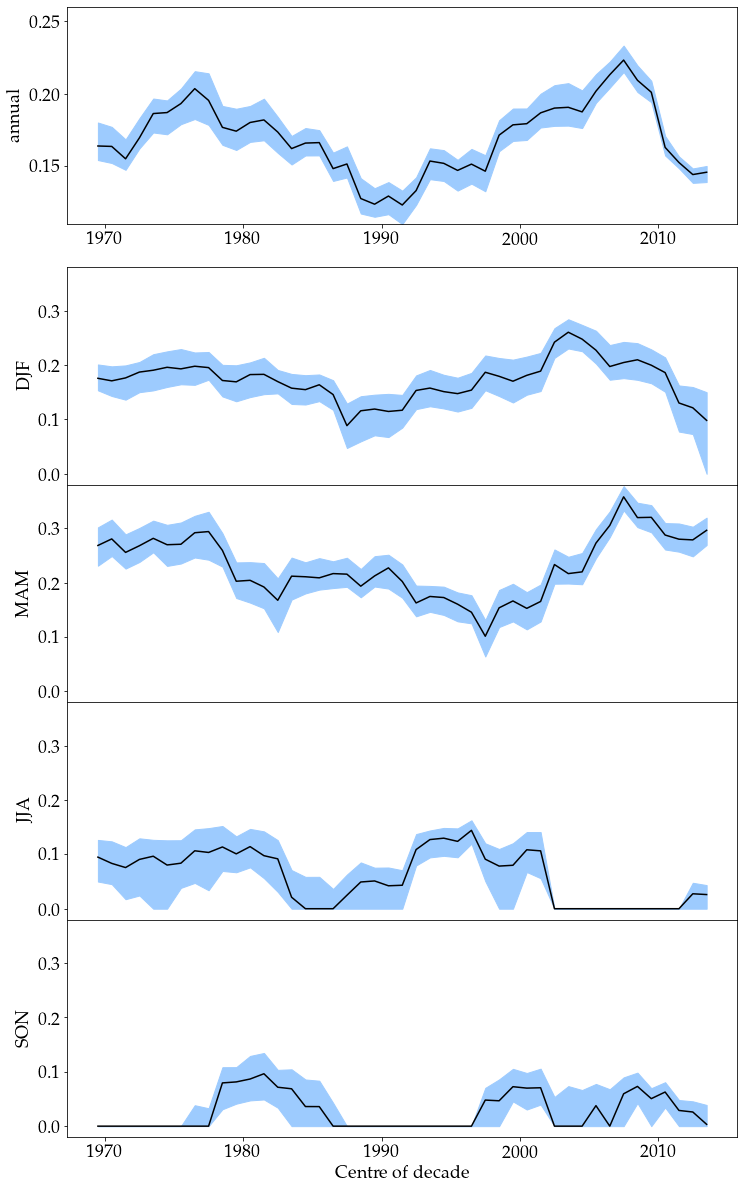

In [33]:
fig,ax = plt.subplots(5,1,figsize=(12,20))
for i,s in enumerate(('annual','DJF','MAM','JJA','SON')):
    if s == 'annual':
        filename = 'fit_files/NINO34_SST__WHOLEPACIFIC_I20_sliding_decade_each_ensemble_STD'
    else:
        filename = 'fit_files/NINO34_SST__WHOLEPACIFIC_I20_10y_'+s+'_STD'
    data = imag_eig(filename)[:,1:]
    years = xr.open_dataset(filename+'_A.nc').start_year
    IQR_timeseries(years+4.5,data,ax=ax[i])
    ax[i].set_ylabel(s)
    ax[i].set_ylim(-0.02,0.38)

plt.xlabel('Centre of decade')
ax[0].set_ylim(0.11,0.26)
fig.subplots_adjust(hspace=0)
box = ax[0].get_position()
box.y0 = box.y0 + 0.03
box.y1 = box.y1 + 0.03
ax[0].set_position(box)
plt.savefig('paperplots/decade_seasonal_imag_samescale_5.pdf')

/Applications/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in reciprocal
  after removing the cwd from sys.path.
/Applications/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in reciprocal
  # Remove the CWD from sys.path while we load stuff.


19.62361109794901 20.29338721826134 21.105501928744566


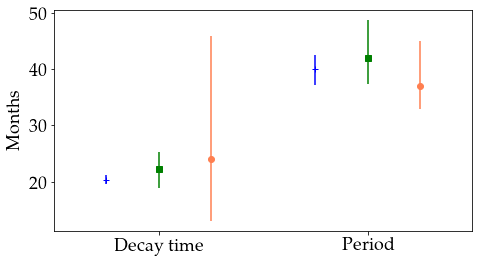

In [31]:
plt.figure(figsize=[7,4])

#Growth
mygrowth = (-np.max(real_eig('fit_files/NINO34_SST__WHOLEPACIFIC_I20_STD')[0],1))**(-1)
growth_med = np.percentile(mygrowth,50)
growth_min = growth_med-np.percentile(mygrowth,25)
growth_max = np.percentile(mygrowth,75)-growth_med
print(growth_med-growth_min,growth_med,growth_med+growth_max)

mygrowthbt = (-np.max(real_eig('fit_files/NINO3_SST__WHOLEPACIFIC_I20_1980_2002_STD')[0],1))**(-1)
growth_medbt = np.percentile(mygrowthbt,50)
growth_minbt = growth_medbt-np.percentile(mygrowthbt,5)
growth_maxbt = np.percentile(mygrowthbt,95)-growth_medbt

plt.errorbar([0],growth_med,[[growth_min],[growth_max]],
            linestyle='None',marker='+',label='CAFEfull',c='b')
plt.errorbar([1],growth_medbt,[[growth_minbt],[growth_maxbt]],
            linestyle='None',marker='s',label='CAFE1980-2002',c='g')
plt.errorbar([2],24,[[11],[22]],
            linestyle='None',marker='o',label='Burgers2005',c='coral')

#Growth
mygrowth = period('fit_files/NINO34_SST__WHOLEPACIFIC_I20_STD')
growth_med = np.percentile(mygrowth,50)
growth_min = growth_med-np.percentile(mygrowth,5)
growth_max = np.percentile(mygrowth,95)-growth_med

mygrowthbt = period('fit_files/NINO34_SST__WHOLEPACIFIC_I20_1980_2002_STD')
growth_medbt = np.percentile(mygrowthbt,50)
growth_minbt = growth_medbt-np.percentile(mygrowthbt,5)
growth_maxbt = np.percentile(mygrowthbt,95)-growth_medbt

plt.errorbar([4],growth_med,[[growth_min],[growth_max]],
            linestyle='None',marker='+',c='b')
plt.errorbar([5],growth_medbt,[[growth_minbt],[growth_maxbt]],
            linestyle='None',marker='s',c='g')
plt.errorbar([6],37,[[4],[8]],
            linestyle='None',marker='o',c='coral')
plt.xticks([1,5],['Decay time','Period'])
plt.ylabel('Months')
plt.xlim(-1,7)
#plt.legend()
plt.tight_layout()
plt.savefig('paperplots/Burgers_comparison.pdf')

In [13]:
indices = xr.load_dataset('saved_indices.nc')

In [19]:
indices.nino34_sst.std('time')

<xarray.DataArray 'nino34_sst' (ensemble_member: 97)>
array([0.9991568 , 1.07224892, 1.07351429, 0.99643513, 1.04024826,
       1.12783039, 1.0225065 , 1.0386254 , 1.02265223, 1.0601581 ,
       1.06786075, 1.09836605, 1.01406378, 1.07656677, 1.08732712,
       1.0295999 , 1.13522909, 1.01616687, 1.10003523, 1.04240312,
       1.05738912, 1.0697046 , 1.06670644, 1.07888901, 1.02369302,
       1.09117701, 1.09779446, 1.05185208, 1.10435522, 1.04949623,
       1.11317606, 1.11249541, 1.08701722, 1.03685184, 1.04886214,
       1.11250297, 1.09187945, 1.04666461, 1.07201898, 1.13259033,
       1.08227327, 1.06930825, 1.00681082, 1.12703122, 1.02762721,
       1.05292213, 1.10812865, 1.04477585, 1.11589006, 1.04055839,
       1.02580964, 1.16456705, 1.04855249, 1.10943793, 1.06790117,
       1.05233038, 1.09783567, 1.06613901, 1.04583424, 1.10076156,
       1.13492448, 1.02955892, 1.05437932, 1.10841931, 1.04829516,
       1.03367965, 1.16330214, 1.11632282, 0.99388723, 1.03998253,
       1.0349912 , 1.07380318, 1.04826231, 1.05320586, 1.04902742,
       1.07624614, 1.05059129, 1.05508007, 1.07930338, 1.04934085,
       1.10498682, 1.08150324, 1.05736105, 1.125449  , 1.00900747,
       1.06738626, 1.12142027, 1.11433293, 1.08927813, 1.0193619 ,
       1.07500059, 1.00858833, 1.10512861, 1.02985087, 1.05204326,
       1.0929968 , 1.05415263])
Coordinates:
    ensemble         int32 96
  * ensemble_member  (ensemble_member) int64 0 1 2 3 4 5 6 ... 91 92 93 94 95 96

In [20]:
indices.wholeP_i20.std('time')

<xarray.DataArray 'wholeP_i20' (ensemble_member: 97)>
array([6.67692918, 6.77334456, 6.8989742 , 7.21739207, 6.92448552,
       7.25580089, 7.09578055, 7.2543689 , 7.32453783, 7.15141251,
       6.71887773, 6.99136556, 6.9470921 , 7.16972163, 6.99542822,
       6.83969228, 7.06315391, 6.82781763, 7.83783946, 6.8960702 ,
       6.77997541, 6.99181937, 6.95732947, 7.46055661, 6.9084212 ,
       7.19038502, 7.06101006, 7.18395948, 7.18381609, 7.17677255,
       7.24411806, 6.95495818, 6.97476909, 7.047159  , 7.16882418,
       7.20147148, 6.98449317, 6.9648157 , 7.06163961, 7.36056881,
       7.19097034, 6.7317492 , 6.94899395, 7.10668945, 6.97210968,
       7.01873547, 7.10246044, 7.14932561, 7.28471656, 7.04048512,
       6.93195336, 7.00651287, 6.84155405, 7.31465871, 6.73641698,
       6.82004899, 7.24492305, 6.8973497 , 6.88896563, 7.11576501,
       7.06187154, 6.77017076, 6.87410261, 6.89878165, 6.72731946,
       7.24296859, 7.56882798, 7.1913505 , 7.02083294, 6.71362639,
       6.99950521, 7.02783375, 7.06280393, 6.78192686, 7.14360352,
       6.90334177, 7.06644897, 7.13124054, 7.17496826, 7.08906034,
       7.08035921, 6.85918225, 6.88415834, 7.00560758, 7.0191003 ,
       6.9336192 , 7.19002861, 7.2447299 , 7.08607169, 6.82397846,
       7.01084223, 6.94936246, 7.37329318, 7.25522536, 7.05572958,
       7.07365364, 7.2237087 ])
Coordinates:
    ensemble         int32 96
  * ensemble_member  (ensemble_member) int64 0 1 2 3 4 5 6 ... 91 92 93 94 95 96